# Notebook Description

This notebook is for the initial exploration of anomly compisites for RMM phases.

# Packages

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
from constants import NWABounds
import constants
import calculation_functions
import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec

In [2]:
import sys
from importlib import reload
sys.path.append('')
import load_dataset as load
import phase_calc_functions as phase_calc
import map_trend_functions
import phase_plot_functions as phase_plot
import miscellaneous#apply_masks

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

import matplotlib.pylab as pylab

params = {'axes.labelsize' : 16,
         'legend.fontsize': 'x-large',
          'axes.titlesize': 'xx-large',
         }

pylab.rcParams.update(params)

In [4]:
image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

# Data

In [5]:
reload(constants)

<module 'constants' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/constants.py'>

In [7]:
# Loading awap
awap = load.load_awap()
awap_ws = phase_calc.wet_season_year(awap)

# Loading RMM
rmm = load.load_rmm()
rmm_ws = phase_calc.wet_season_year(rmm)

awap_ws, rmm_ws = calculation_functions.match_dataset_time(awap_ws, rmm_ws)

New datasets are now of lenght d1 = 5578 and d2 = 5578


In [8]:
awap = miscellaneous.apply_masks(awap)

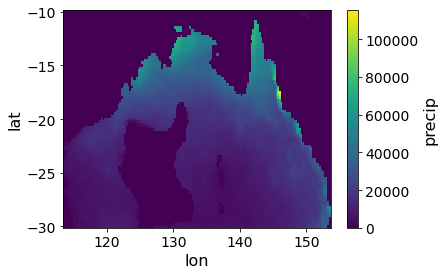

In [9]:
awap.sum(dim = 'time').precip.plot()

In [10]:
rmm

<xarray.Dataset>
Dimensions:    (time: 17756)
Coordinates:
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2023-01-10
Data variables:
    RMM1       (time) float64 1.634 1.603 1.516 1.51 ... -0.3384 -0.3888 -0.29
    RMM2       (time) float64 1.203 1.015 1.086 1.036 ... 0.804 0.827 0.6867
    phase      (time) int64 5 5 5 5 5 6 6 6 6 7 6 5 ... 6 6 6 7 7 7 7 7 7 7 7 7
    amplitude  (time) float64 2.029 1.897 1.865 1.831 ... 0.8723 0.9139 0.7454

# Phase Splitting and Wet Season Calibration

Splitting into different MJO phases (1-8) and then moving the data from Jan-March back one year. The moving of the data back one year means that all of the data for an individual wet season is now with in the one year. This makes resampling much easier.

In [11]:
# Readjusting the years, so when a resample takes plact, it is just the data for one wet season. If 
# this was not done it would be the end half of one wet season and the start of another. This moves that data
# from the start of the wet season back or forwards a year (I don't remember), so that they line up

phase_calc = reload(phase_calc)
awap_ws = phase_calc.wet_season_year(awap)

rmm_ws = phase_calc.wet_season_year(rmm)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [12]:
np.unique(awap.time.dt.year.values)

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [13]:
np.unique(awap_ws.time.dt.year.values)

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [14]:
len(np.unique(awap_ws.time.dt.year.values))

51

In [15]:
awap_count = calculation_functions.resample_count(awap_split_ws)
awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count)
awap_count_sub 

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 3 4 3 ... 0 0 0 0 0 0 0 0

In [16]:
awap_sum = calculation_functions.resample_sum(awap_split_ws)
awap_sum_sub = phase_calc.resample_phase_to_subphase(awap_sum)
awap_sum_sub 

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [17]:
awap_int = awap_sum.sum(dim='year')/awap_count.sum(dim='year')
awap_int

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 9)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [18]:
awap_int_mean = awap_int.mean(dim='phase')
awap_int_mean

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
Data variables:
    precip   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [19]:
awap_phase_anom = awap_int - awap_int_mean
awap_phase_anom

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 9)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

Activated
[-10  -8  -6  -4  -2   0   2   4   6   8  10]
Saving to /g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/RMM_phase_mean_intensity.png


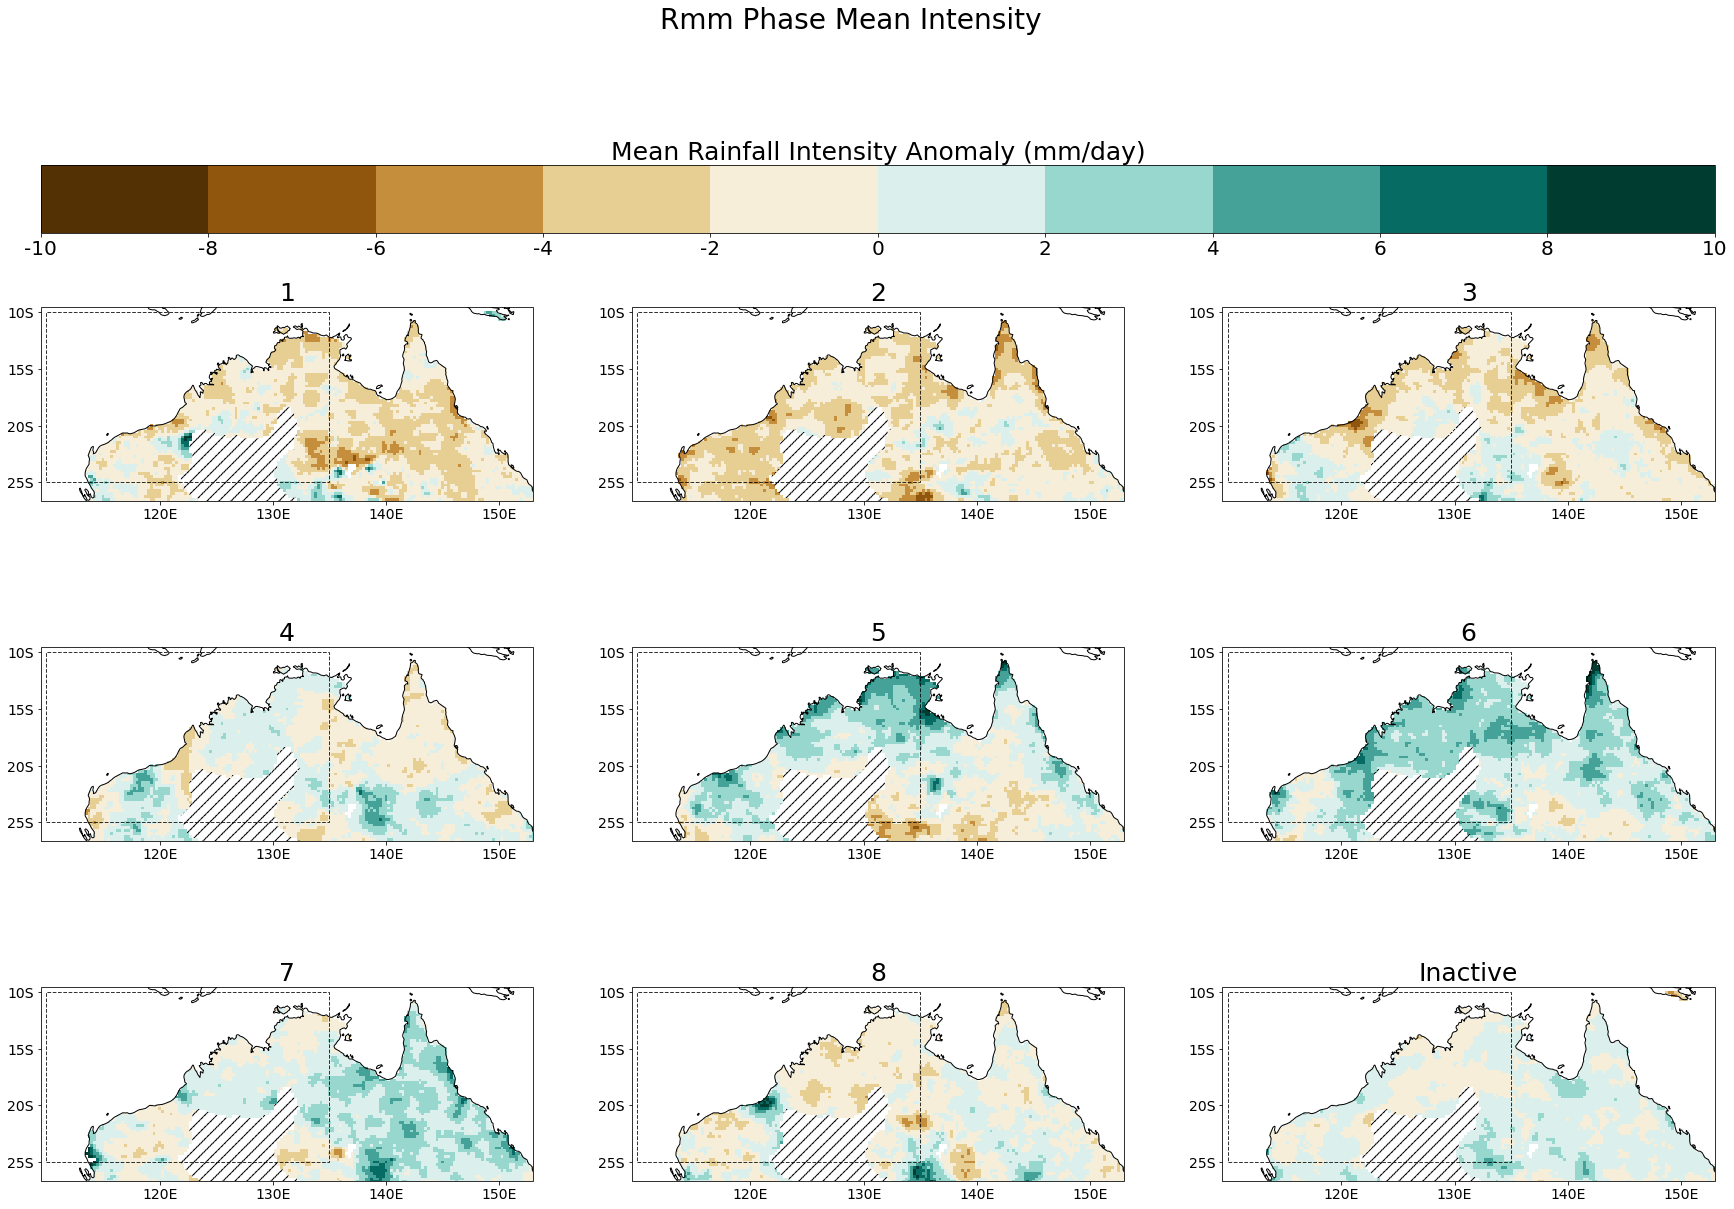

In [20]:
reload(map_trend_functions)
map_trend_functions.trend_plots(awap_phase_anom.precip, vmax=10, step=2, cmap = 'BrBG', 
                                tick_symbol=None,
                                colorbar_title = 'Mean Rainfall Intensity Anomaly (mm/day)',
                               savedir = constants.IMAGE_SAVE_DIR, title='RMM_phase_mean_intensity'
                               )

# Lat Lon Mean

In [21]:
awap_sum_sub.sum(dim=['lat', 'lon'])

<xarray.Dataset>
Dimensions:  (phase: 4, year: 46)
Coordinates:
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year) float64 6.529e+05 8.964e+05 ... 4.933e+05 6.921e+05

In [22]:
dims_to_sum = ['lat', 'lon', 'year']

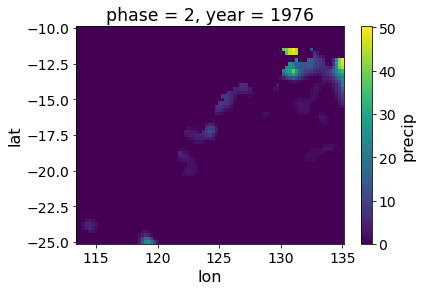

In [23]:
awap_sum.sel(lat=slice(*NWABounds.lat), lon=slice(*NWABounds.lon)).isel(phase=1, year=1).precip.plot()

In [24]:
awap_int = awap_sum.sel(lat=slice(*NWABounds.lat), lon=slice(*NWABounds.lon)).sum(dim=dims_to_sum)/\
           awap_count.sel(lat=slice(*NWABounds.lat), lon=slice(*NWABounds.lon)).sum(dim=dims_to_sum)
awap_int_anom = awap_int-awap_int.mean(dim='phase')

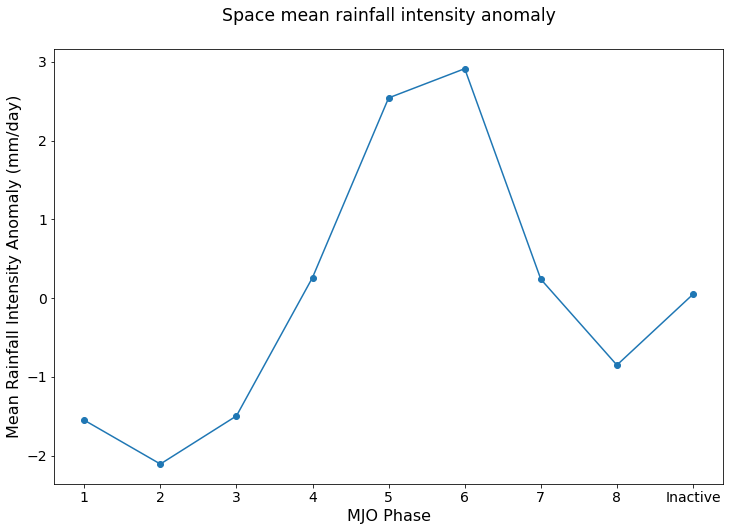

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

x_labels = awap_int_anom.phase.values
x_labels[-1] = 'Inactive'

ax.plot(x_labels, awap_int_anom.precip.values, marker='o')

ax.set_xlabel('MJO Phase')
ax.set_ylabel('Mean Rainfall Intensity Anomaly (mm/day)')

ax.set_title('Space mean rainfall intensity anomaly', y=1.05)

fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'space_mean_intenstiy.png'), 
            dpi=500, bbox_inches='tight')

# Percent of Days as Raindays

In [26]:
reload(calculation_functions)

<module 'calculation_functions' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/calculation_functions.py'>

In [27]:
rmm_count = phase_calc.count_in_rmm_phase(rmm_ws)
rmm_count = calculation_functions.convert_time_to_year(rmm_count)
rmm_count

<xarray.Dataset>
Dimensions:  (phase: 9, year: 49)
Coordinates:
  * phase    (phase) <U8 '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2019 2020 2021 2022 2023
Data variables:
    number   (phase, year) int64 12 0 6 11 6 0 6 9 1 ... 18 56 15 23 46 40 40 18

In [28]:
awap_count.sum(dim='year')

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 9)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, lat, lon) int64 0 0 0 0 0 0 21 20 27 ... 0 0 0 0 0 0 0 0 0

In [29]:
awap_frac_days_rain = awap_count.sum(dim='year').precip/rmm_count.sum(dim='year').number
awap_frac_days_rain

<xarray.DataArray (phase: 9, lat: 80, lon: 161)>
array([[[0.        , 0.        , 0.        , ..., 0.43865031,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.38957055,
         0.45092025, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.40797546,
         0.43251534, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.4086758 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.34018265,
         0.38812785, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.35844749,
         0.3630137 , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.42651593,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.39260021,
         0.4270298 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.4049332 ,
         0.40236382, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'

In [30]:
awap_frac_days_rain = miscellaneous.apply_masks(awap_frac_days_rain)

In [31]:
awap_frac_days_rain.max().values

array(0.86)

Activated
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Saving to /g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/RMM_phase_mean_frac_days_as_raindays.png


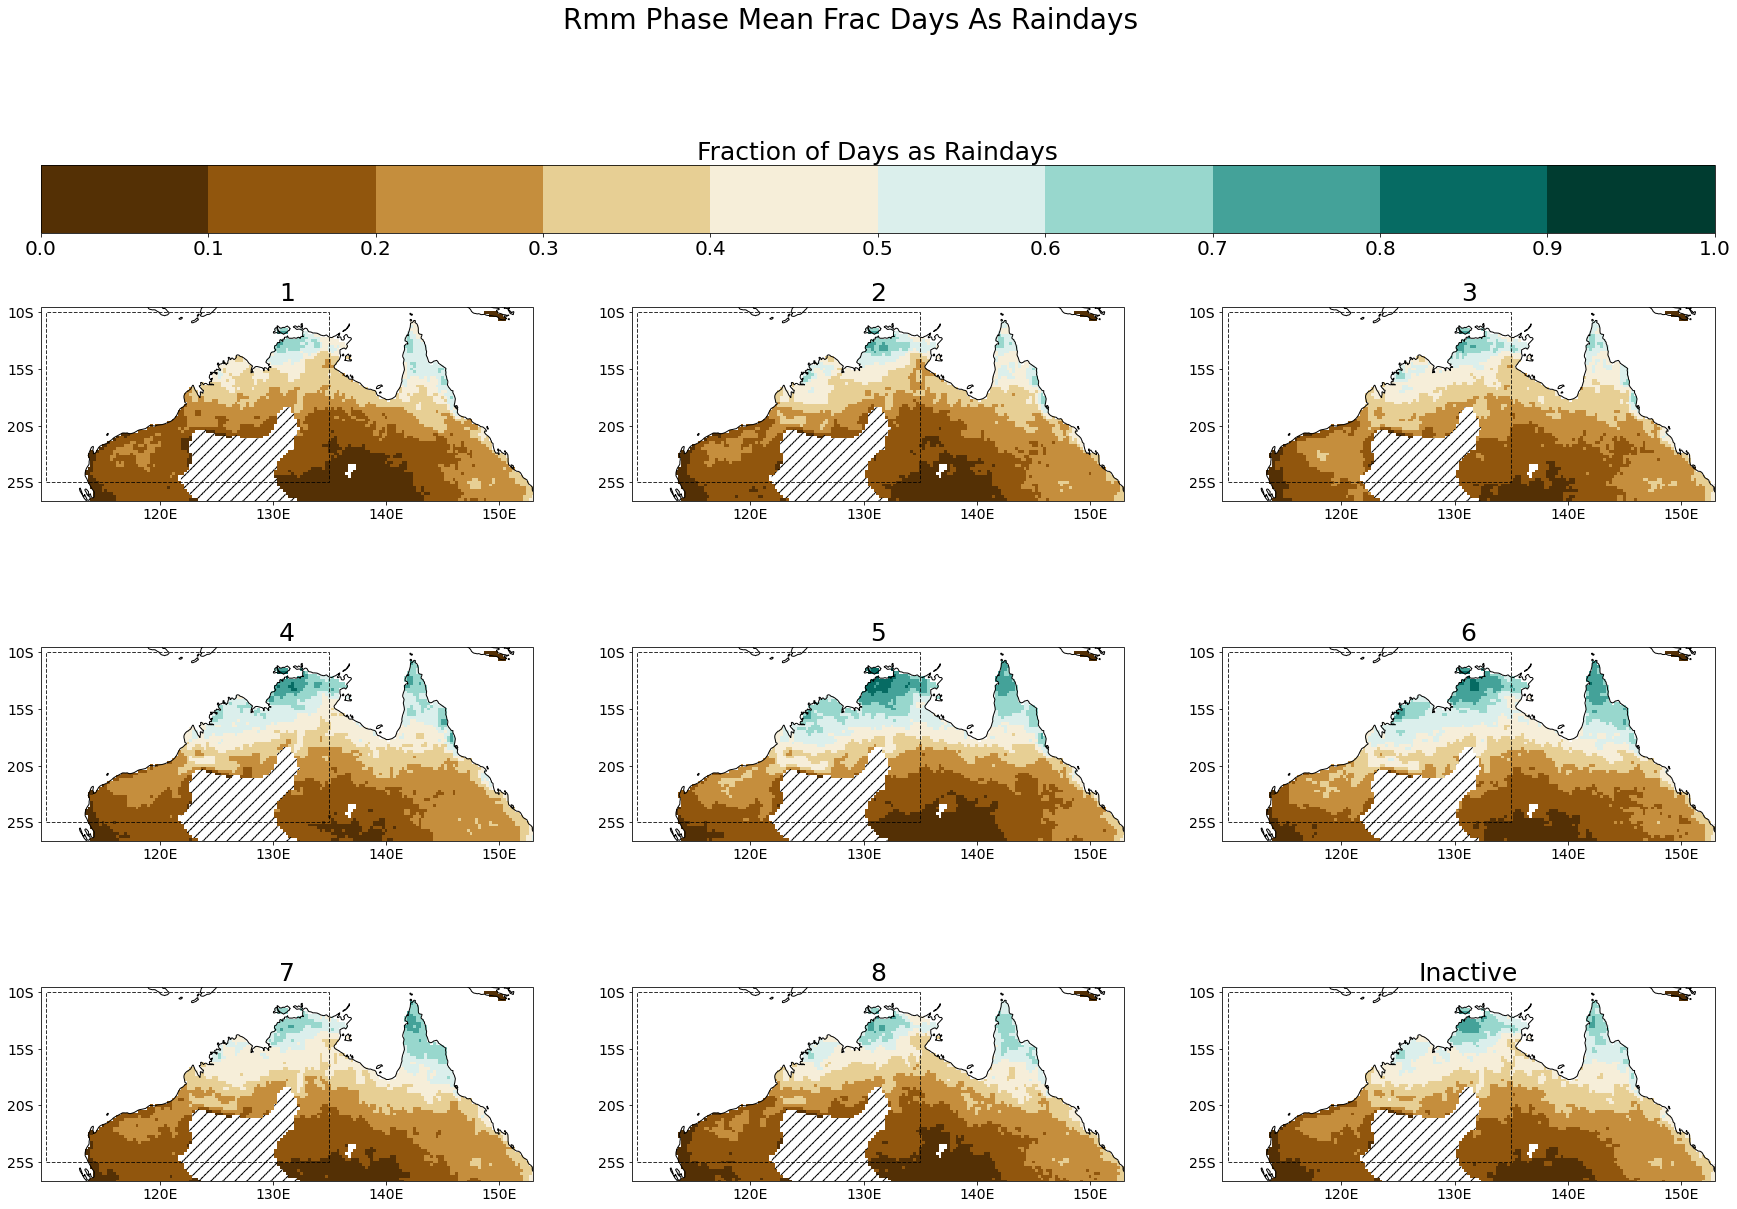

In [32]:
reload(map_trend_functions)
map_trend_functions.trend_plots(awap_frac_days_rain, vmin=0, vmax=1, step=.1, cmap = 'BrBG', 
                                tick_symbol=None,
                                colorbar_title = 'Fraction of Days as Raindays', round_level=1,
                               savedir = constants.IMAGE_SAVE_DIR, title='RMM_phase_mean_frac_days_as_raindays'
                               )

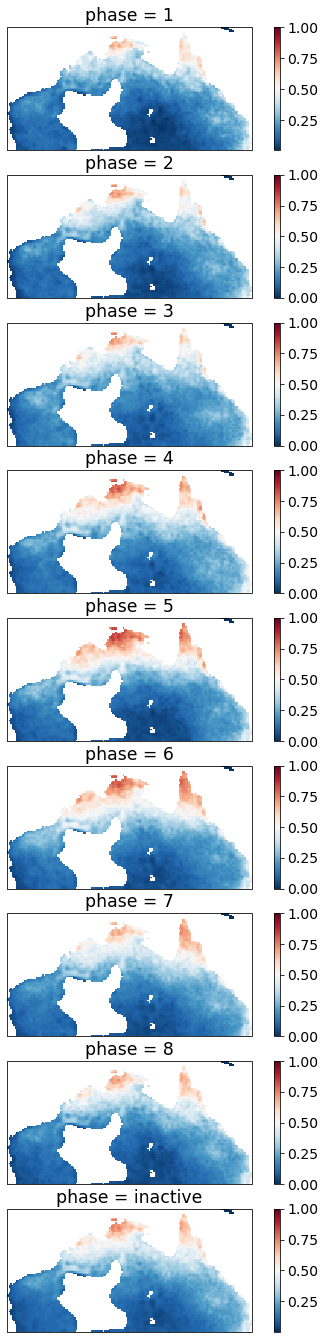

In [34]:
da = awap_frac_days_rain

fig = plt.figure(figsize=(8, 24))

phases = da.phase.values
num_plots = len(phases)

for i, phase in enumerate(phases):
    ax = fig.add_subplot(num_plots, 1, i+1, projection=ccrs.PlateCarree())
    
    da_sub = da.sel(phase=phase)
    da_sub.plot(ax=ax, cmap='RdBu_r', vmax=1)

In [35]:
awap_frac_days_rain_mean = awap_frac_days_rain.sel(lat=slice(*NWABounds.lat), lon=slice(*NWABounds.lon)).mean(dim=['lat', 'lon'])
awap_frac_days_rain_mean

<xarray.DataArray (phase: 9)>
array([0.25253352, 0.27321555, 0.3045535 , 0.33967325, 0.36930235,
       0.37453392, 0.30134231, 0.27698529, 0.31555977])
Coordinates:
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'

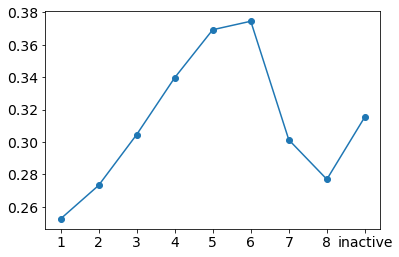

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(awap_frac_days_rain_mean.phase.values, awap_frac_days_rain_mean.values, marker='o')

In [37]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111)

# x_labels = awap_int_anom.phase.values
# x_labels[-1] = 'Inactive'

# ax.plot(x_labels, awap_int_anom.precip.values, marker='o')

# ax.set_xlabel('MJO Phase')
# ax.set_ylabel('Mean Rainfall Intensity Anomaly (mm/day)')

# ax.set_title('Space mean rainfall intensity anomaly', y=1.05)

# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'space_mean_intenstiy.png'), 
#             dpi=500, bbox_inches='tight')